# Axes: Ticks, Ranges, Legends

In [4]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Main properties of an axis:
- *Limits*: value where the axis starts and ends
- *Ticks*: positions of indicator lines on the axis
- *Tick labels*: text shown at ticks

In [5]:
df = pd.read_csv('sales.csv', parse_dates=['Date'])
df['Month'] = df['Date'].dt.month
sales = df.groupby(['Month', 'Product'])['Amount'].sum().unstack()
sales.head()

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0


<IPython.core.display.Javascript object>


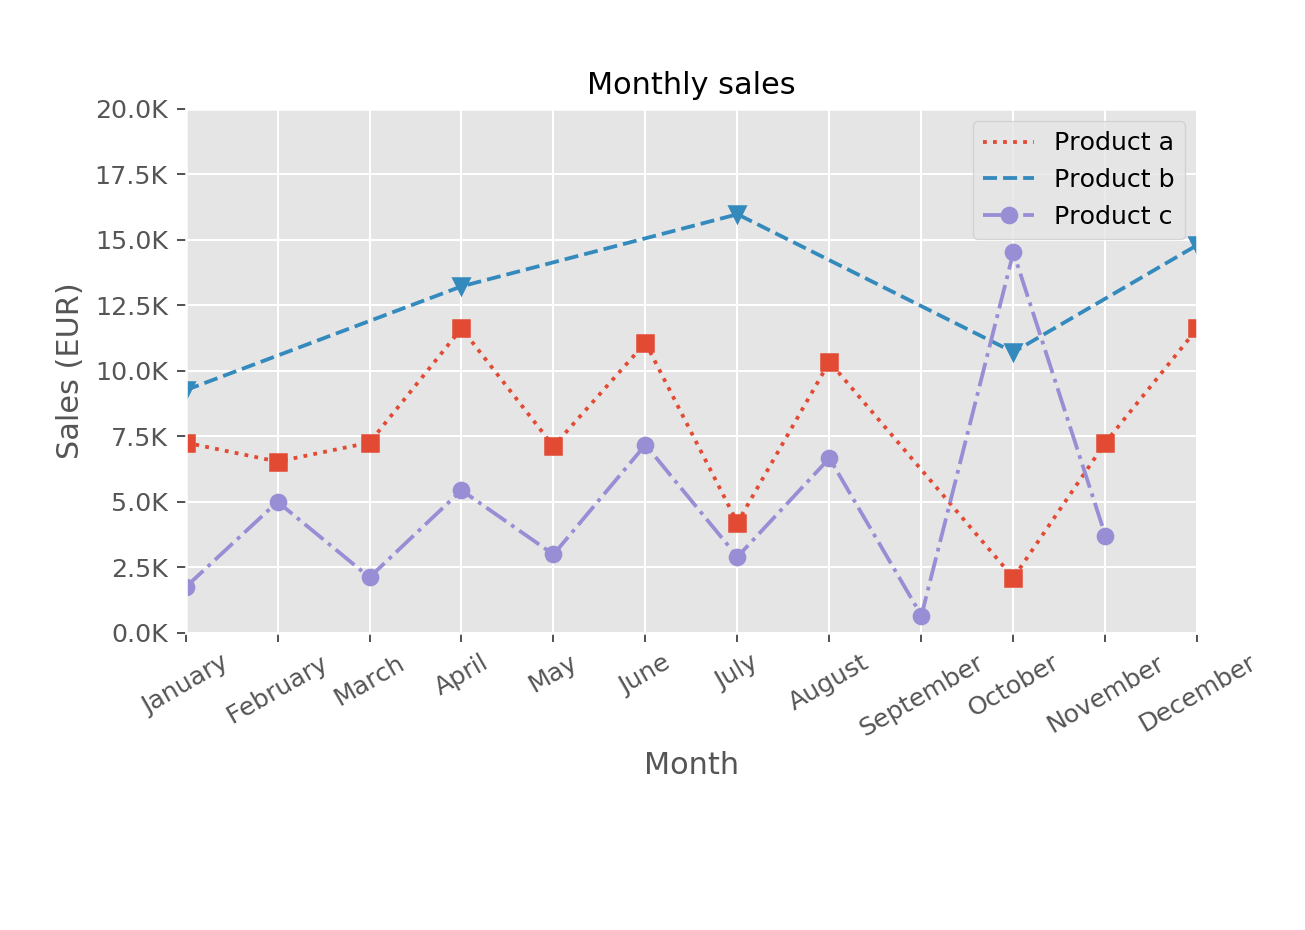

In [7]:
styles = {'a': ':s', 'b': '--v', 'c': '-.o'}
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(6,3))
    for column in styles:
        sales[column].dropna().plot(ax=ax, style=styles[column], grid=True, ylim=(0,20000),
                                    legend=True, label='Product ' + column)
        
ax.set_title("Monthly sales")      
ax.set_ylabel('Sales (EUR)')

ax.set_xticks(range(1,13))

import calendar
ax.set_xticklabels([calendar.month_name[x] for x in sales.index], rotation=30, ha='right')

def make_yticklabel(tick_value, pos): 
    return "{}K".format(tick_value / 1000)

from matplotlib.ticker import FuncFormatter 
ax.yaxis.set_major_formatter(FuncFormatter(make_yticklabel))

#ax.legend(labels=['Apples', 'Pears', 'Oranges'], loc='upper left', markerfirst=False)

fig.tight_layout()